再生回数    74.684932
dtype: float64
再生回数    61.0
dtype: float64


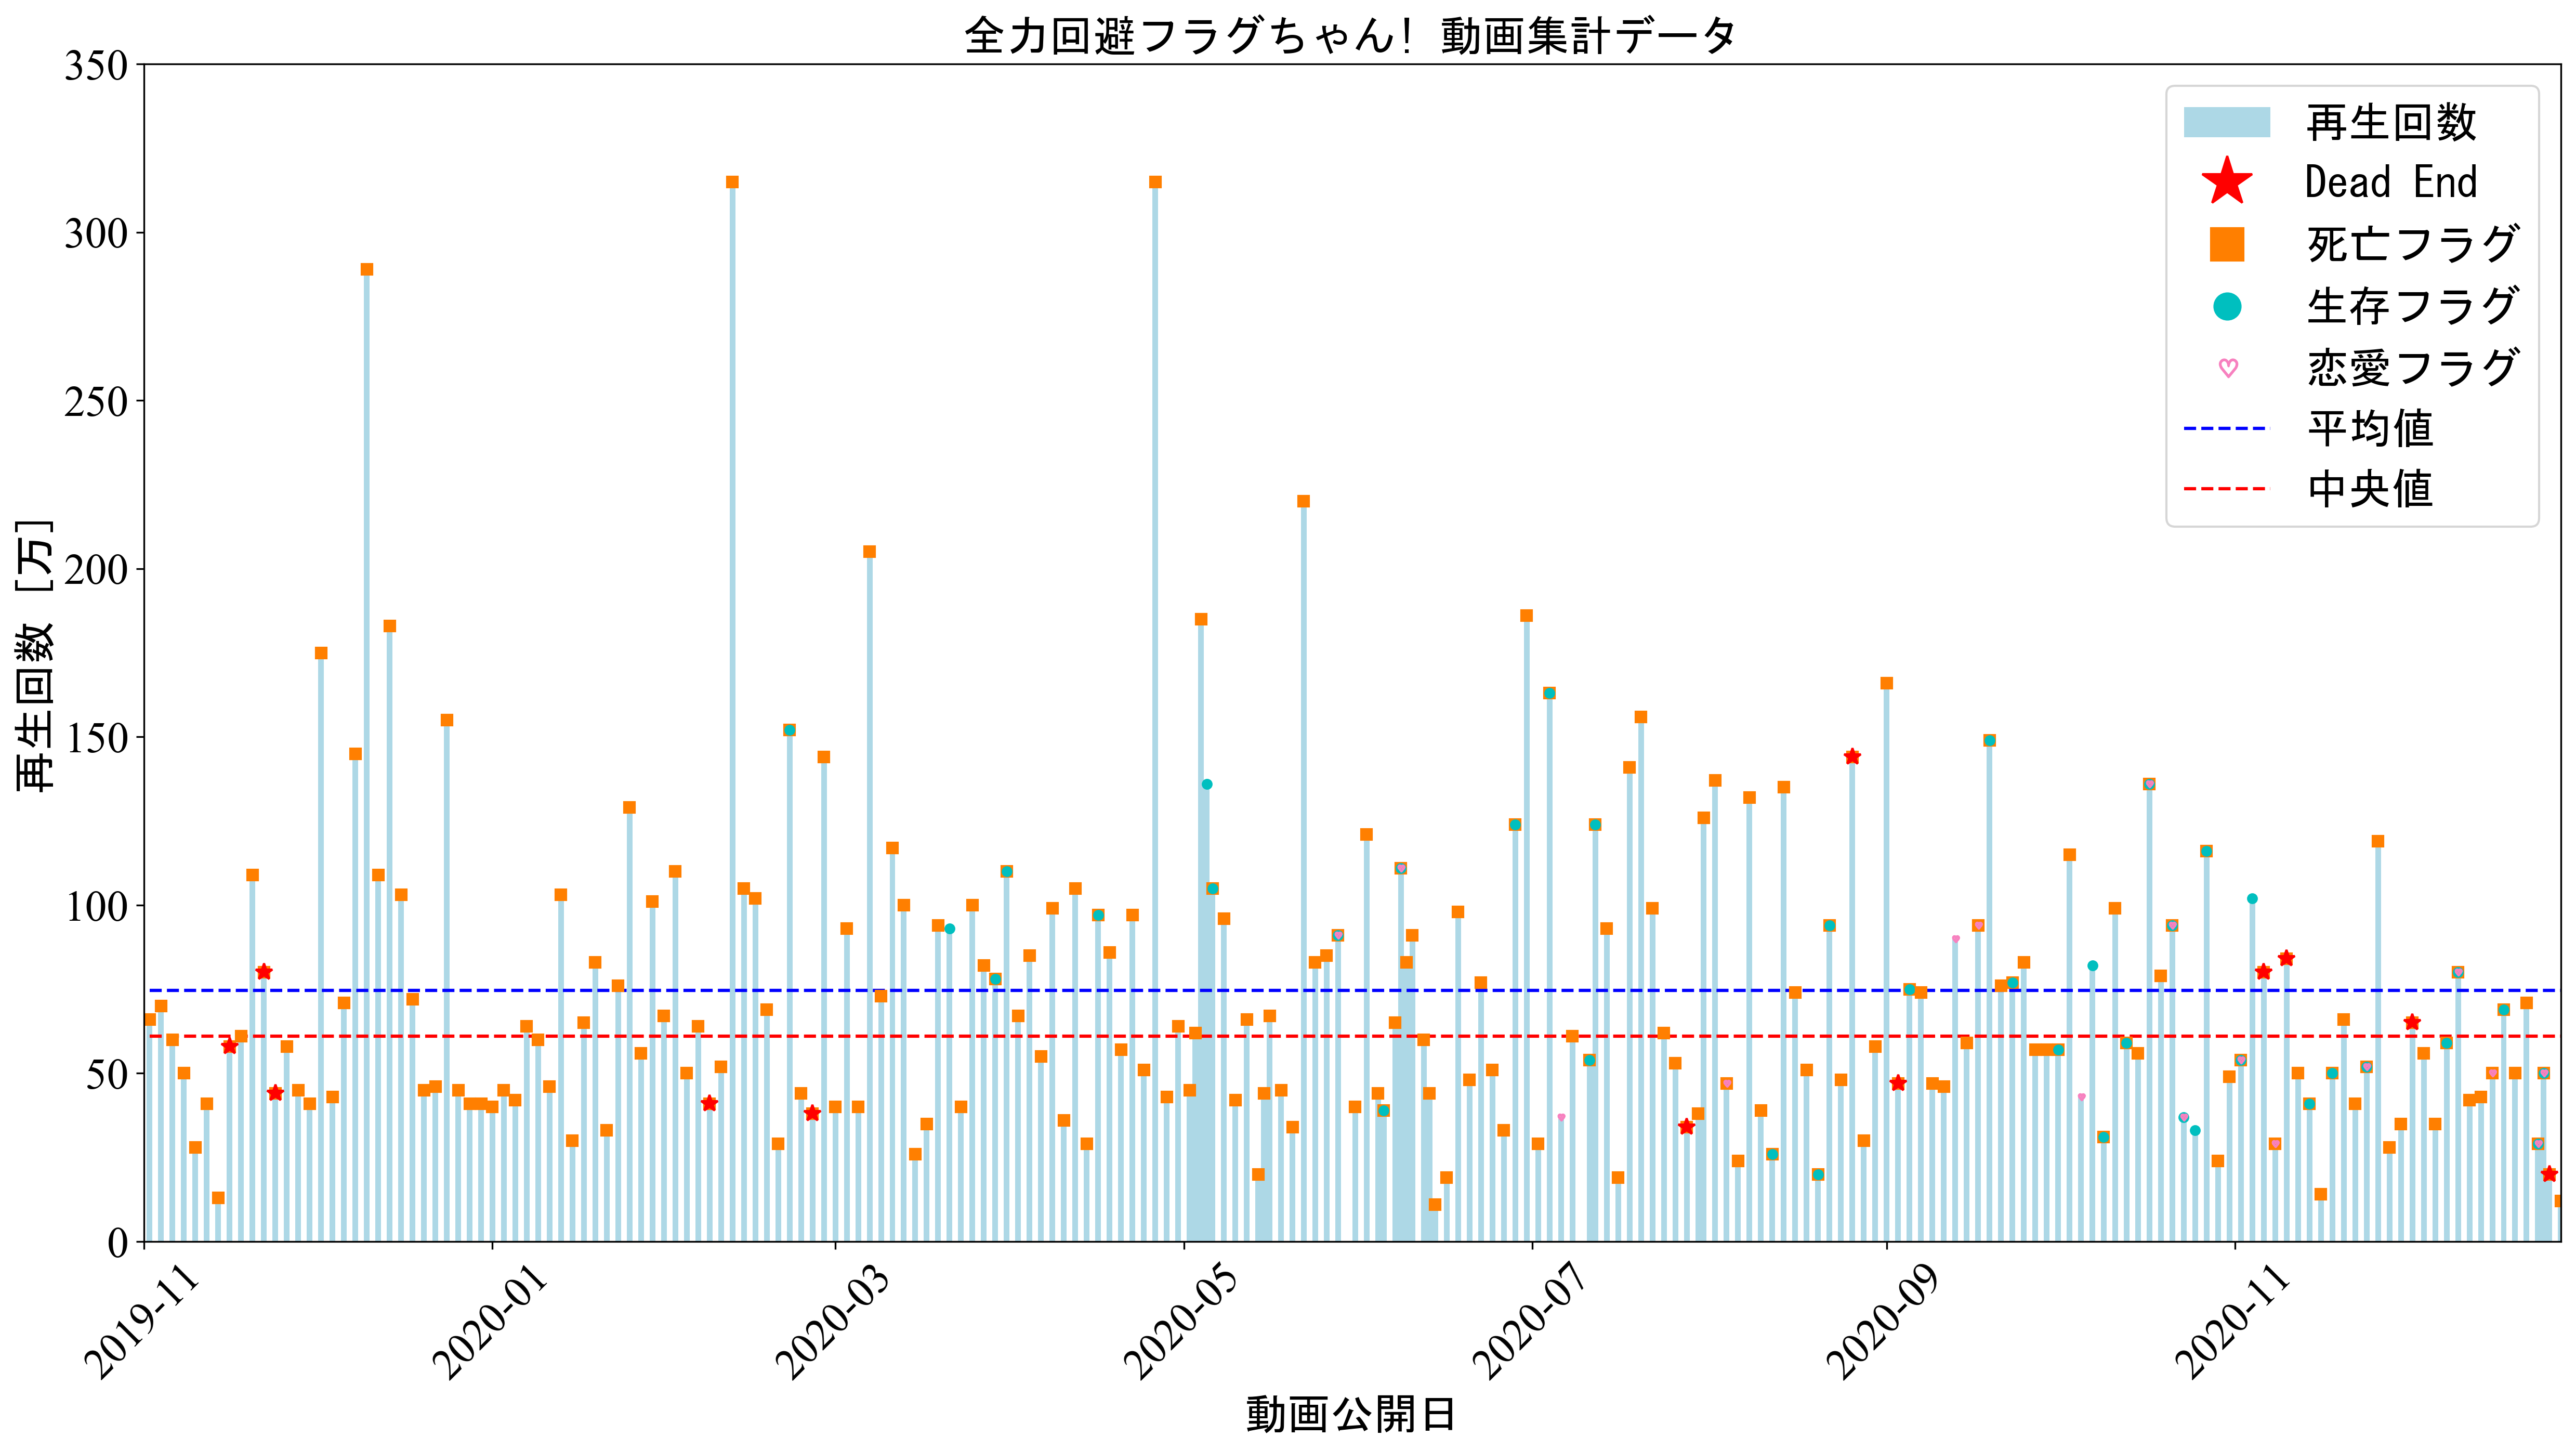

In [8]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
from matplotlib.path import Path
from pandas.plotting import register_matplotlib_converters

#データセット対象のCSV ファイル
file = "flag_video_data_date.csv"
#Date, 再生回数
num_play = pd.read_csv(file, header=0, encoding='UTF8', usecols=[1, 3], parse_dates=[0])
num_play = num_play.dropna(how='all')
#Date, Dead End
num_dead = pd.read_csv(file, header=0, encoding='UTF8', usecols=[1, 4], parse_dates=[0])
num_dead = num_dead.dropna(how='all')
#Date, 死亡フラグ
num_shibou = pd.read_csv(file, header=0, encoding='UTF8', usecols=[1, 5], parse_dates=[0])
num_shibou = num_shibou.dropna(how='all')
#Date, 生存フラグ
num_seizon = pd.read_csv(file, header=0, encoding='UTF8', usecols=[1, 6], parse_dates=[0])
num_seizon = num_seizon.dropna(how='all')
#Date, 恋愛フラグ
num_renai = pd.read_csv(file, header=0, encoding='UTF8', usecols=[1, 7], parse_dates=[0])
num_renai = num_renai.dropna(how='all')

# debug
#print(num_play)
#num_play.to_csv('exam_num_play.csv')

#Plot するグラフ
#Date
x = num_play[num_play.columns[0]]
#print(type(x[0]))

#x = pd.date_range(x[0], x[218], freq='D')
#再生回数
y1 = num_play[num_play.columns[1]]
#Dead End
y2 = num_dead[num_dead.columns[1]]
#死亡フラグ
y3 = num_shibou[num_shibou.columns[1]]
#生存フラグ
y4 = num_seizon[num_seizon.columns[1]]
#恋愛フラグ
y5 = num_renai[num_renai.columns[1]]

#グラフの大きさ
plt.figure(figsize=(20.0, 10.0), dpi=300)
#フォント設定
plt.rcParams['font.family'] = 'Times New Roman'


# グラフプロット
## 再生回数を棒グラフでプロット
play = plt.bar(x, y1, width=1.0, bottom=None, color="lightblue")

## カウントを点でプロット
for i in range(len(x)):
    if y3[i] == 1:
        shibou, = plt.plot(x[i], y1[i], marker='s', markersize=5, color='#ff7f00', linestyle='None')

    if y2[i] == 1:
        dead, = plt.plot(x[i], y1[i], marker='*', markersize=8, color='r', linestyle='None')
    
    if y4[i] == 1:
        seizon, = plt.plot(x[i], y1[i], marker='o', markersize=4, color='c', linestyle='None')

    if y5[i] == 1:
        renai, = plt.plot(x[i], y1[i], marker='$\heartsuit$', markersize=3, color='#f781bf', linestyle='None')

## 平均値と中央値を横線でプロット
avg = plt.hlines(num_play.mean(axis=0), x[0], x[len(x) - 1], 'b', linestyles='dashed')
med = plt.hlines(num_play.median(axis=0), x[0], x[len(x) - 1], 'r', linestyles='dashed')
print(num_play.mean(axis=0))
print(num_play.median(axis=0))
        
# 軸の範囲
plt.xlim('2019-11-01', x[len(x) - 1])
plt.ylim([0, 350])

# グラフタイトル
plt.title("全力回避フラグちゃん! 動画集計データ", fontname="MS Gothic", fontsize=20)

# 軸メモリ
plt.tick_params(axis='x', labelsize=20, labelrotation=45)
plt.tick_params(axis='y', labelsize=20)

# ラベル名
plt.xlabel("動画公開日", fontsize=20, fontname="MS Gothic")
plt.ylabel("再生回数 [万]", fontname="MS Gothic", fontsize=20)

# 凡例
play_title = "再生回数"
dead_title = "Dead End"
shibou_title = "死亡フラグ"
seizon_title = "生存フラグ"
renai_title = "恋愛フラグ"
avg_title = "平均値"
med_title = "中央値"

plt.legend([play, dead, shibou, seizon, renai, avg, med], [play_title, dead_title, shibou_title, seizon_title, renai_title, avg_title, med_title], bbox_to_anchor=(1.0, 1.0), prop={"family":"MS Gothic", 'size':20}, markerscale=3)

#画像保存
plt.savefig("flag_video_stas_graph.png", bbox_inches="tight", pad_inches=0.0)